### Simple Linear Regression using SkLearn Linear Model 

### Step 1: Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Step 2: Loading the dataset

In [3]:
data=pd.read_csv('HousePrice.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
area     47 non-null int64
room     47 non-null int64
price    47 non-null int64
dtypes: int64(3)
memory usage: 1.2 KB


In [4]:
data.head()

,area,room,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [5]:
data.describe()

,area,room,price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [6]:
data.columns

Index(['area', 'room', 'price'], dtype='object')

### Step 3: Relationship between predictors and response using scatter plot and correlation matrix

In [7]:
data.corr()

,area,room,price
area,1.000000,0.559967,0.854988
room,0.559967,1.000000,0.442261
price,0.854988,0.442261,1.000000


by above the correlation matrix area and price and strongly correlated.

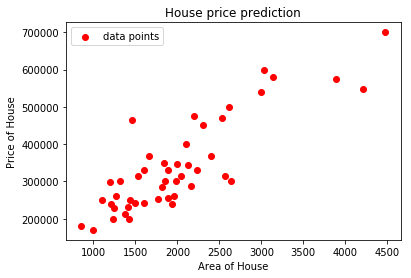

In [10]:
plt.scatter(data.area,data.price,color='r',label='data points')
plt.xlabel('Area of House')
plt.ylabel('Price of House')
plt.title('House price prediction')
plt.legend()
plt.show()

by analysing above graph, it's clearly seen that as area of house increases price of house also get increased. so one can apply Univariate Linear Regression (Simple Linear Regression) y=mx+c (as straight line is the best fitting line for this dataset)

### Step 4: Creating the Simple Linear Regression Model

Equation of simple LR is y=mX+c OR y=b0+b1X 
* where, m/b1= coefficient of X 
         c/b0=intercept
         X=feature vector (independent variable)
         y=response vector/ target vector (dependent variable)

In [22]:
X=data[['area']]   # dataframe object (2D)

In [23]:
X.head()

,area
0,2104
1,1600
2,2400
3,1416
4,3000


In [24]:
print(type(X))

<class 'pandas.core.frame.DataFrame'>


In [25]:
print(X.shape)

(47, 1)


In [26]:
y=data.price   # series object (1D)

In [27]:
y.head()

0    399900
1    329900
2    369000
3    232000
4    539900
Name: price, dtype: int64

In [28]:
print(type(y))

<class 'pandas.core.series.Series'>


In [29]:
print(y.shape)

(47,)


In [31]:
# importing sklearn the linear model LinearRegression
from sklearn.linear_model import LinearRegression

LRmodel=LinearRegression()
LRmodel.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Step 5: Interpret model coefficient 

In [54]:
b0=LRmodel.intercept_
print('b0/c:',LRmodel.intercept_)

b0/c: 71270.49244872917


In [53]:
b1=LRmodel.coef_
print('b1/m:',LRmodel.coef_)

b1/m: [134.52528772]


### Step 6: Making prediction with our model

In [36]:
yp=LRmodel.predict(X)

In [41]:
yp  #predicted y values

array([354311.69781212, 286510.95280112, 394131.18297731, 261758.29986059,
       474846.35560945, 338303.18857341, 277632.28381158, 263238.07802551,
       256915.38950266, 272251.27230277, 332249.550626  , 340321.06788921,
       325523.28623999, 673674.73085997, 241848.557278  , 380678.65420528,
       248843.87223945, 237543.74807095, 422246.96811084, 479016.63952878,
       308976.6758504 , 325254.23566454, 287049.053952  , 335209.10695584,
       594573.86168047, 219248.30894099, 267408.36194484, 411081.36923006,
       367226.12543326, 426013.67616701, 318662.49656625, 205795.78016897,
       345702.07939802, 493276.32002713, 314895.78851009, 264583.33090272,
       237947.32393411, 358078.40586828, 638294.58018955, 362114.16449989,
       295120.57121521, 372338.08636663, 416596.90602659, 232700.83771302,
       185886.03758637, 320411.32530662, 233104.41357618])

In [42]:
y.values  # actual y values

array([399900, 329900, 369000, 232000, 539900, 299900, 314900, 198999,
       212000, 242500, 239999, 347000, 329999, 699900, 259900, 449900,
       299900, 199900, 499998, 599000, 252900, 255000, 242900, 259900,
       573900, 249900, 464500, 469000, 475000, 299900, 349900, 169900,
       314900, 579900, 285900, 249900, 229900, 345000, 549000, 287000,
       368500, 329900, 314000, 299000, 179900, 299900, 239500],
      dtype=int64)

### Step 7: Model Evaluation Metrics

for continous values, accuracy metric is not good. (It is good for classification)

so, MAE (Mean Abs Error), MSE (Mean Squared Error), RMSE (Root Mean Squared Error) are used for Linear Regression

In [43]:
#importing thr metrics library
from sklearn.metrics import mean_squared_error

In [45]:
mean_squared_error?

In [44]:
print('MSE:',mean_squared_error(y,yp))

MSE: 4116265480.866083


In [46]:
print('RMSE',np.sqrt(mean_squared_error(y,yp)))

RMSE 64158.12872010906


### Step 8: Coefficient of determination (R-squared value)

* This coefficient, which is more commonly known as R-squared (or R2), assesses how strong the linear relationship is between two variables
* The coefficient of determination is a statistical measurement that examines how differences in one variable can be explained by the difference in a second variable, when predicting the outcome of a given event
* It is sometimes referred to as the "goodness of fit"
* This measure is represented as a value between 0.0 and 1.0, where a value of 1.0 indicates a perfect fit, and is thus a highly reliable model for future forecasts, while a value of 0.0 would indicate that the model fails to accurately model the data at all. 

In [48]:
LRmodel.score?

In [49]:
print('R-squared value:',LRmodel.score(X,y))

R-squared value: 0.7310037839755306


### Step 9: Visualizing the Simple LR model

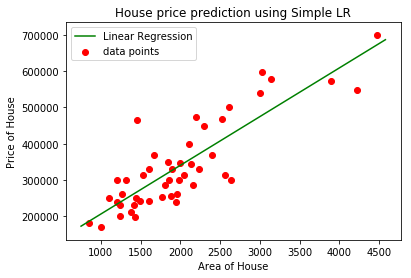

In [58]:
#plotting values 
x_max = np.max(X) + 100
x_min = np.min(X) - 100
#calculating line values of x and y
x = np.linspace(x_min, x_max, 1000)
y = b0 + b1 * x
#plotting line 
plt.plot(x, y, color='g', label='Linear Regression')
#plotting data points
plt.scatter(data.area,data.price,color='r',label='data points')
plt.xlabel('Area of House')
plt.ylabel('Price of House')
plt.title('House price prediction using Simple LR')
plt.legend()
plt.show()